# Activity 8 - Interaction and Animation

We saw in our previous notebook how to create visualisations using matplotlib, seaborn, and pandas - however, in most cases these were static. We did get some interaction through the 3D plots and through using the Plotly library. Here, we are going to pursue this further, and look at how we can incorporate interaction and animation into our tools.

In particular, interaction techniques are useful for creatng dashboards (visual analytics) interfaces. Animations can be useful for conveying the story, by linking multiple still images together or by showing the analytical process.

In this example notebook, we demonstrate how to create interactive widgets that can be used to filter data from a dataframe, either based on range selection or by item selection. We also demonstrate how an animated GIF can be constructed by taking frames of a plot to build an animation. We use a live data set based on COVID-19 to illustrate the concepts in this notebook.

Further details are in the following blog post: https://towardsdatascience.com/interactive-controls-for-jupyter-notebooks-f5c94829aee6

In [1]:
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

In [2]:
!pip install ipywidgets

In [3]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [4]:
df = pd.read_csv('https://coronavirus.data.gov.uk/downloads/csv/coronavirus-cases_latest.csv')
df

,Area name,Area code,Area type,Specimen date,Daily lab-confirmed cases,Cumulative lab-confirmed cases,Cumulative lab-confirmed cases rate
0,Stoke-on-Trent,E06000021,ltla,2021-04-26,5,20083,7833.4
1,Staffordshire Moorlands,E07000198,ltla,2021-04-26,5,5351,5436.1
2,Hackney and City of London,E09000012,ltla,2021-04-26,5,21672,7451.5
3,Staffordshire Moorlands,E07000198,ltla,2021-04-25,6,5346,5431.0
4,Newark and Sherwood,E07000175,ltla,2021-04-26,4,7292,5956.5
...,...,...,...,...,...,...,...
45292,Norfolk,E10000020,utla,2021-01-13,621,28630,3153.9
45293,Norfolk,E10000020,utla,2021-01-12,671,28009,3085.5
45294,Norfolk,E10000020,utla,2021-01-11,795,27338,3011.6
45295,Norfolk,E10000020,utla,2021-01-10,504,26543,2924.0


In [5]:
@interact
def show_articles_more_than(column='Daily lab-confirmed cases', x=20):
    return df.loc[df[column] > x]

interactive(children=(Text(value='Daily lab-confirmed cases', description='column'), IntSlider(value=20, descr…

In [6]:
# What if we want a custom min-max range for our slider?
# https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html

@interact
def show_articles_more_than(column='Daily lab-confirmed cases', x=widgets.IntSlider(min=0, max=1000, step=1, value=10)):
    return df.loc[df[column] > x]

interactive(children=(Text(value='Daily lab-confirmed cases', description='column'), IntSlider(value=10, descr…

In [7]:
@interact
def show_for_place(column='Area name', x=sorted(df['Area name'].unique())):
    return df.loc[df[column] == x]

interactive(children=(Text(value='Area name', description='column'), Dropdown(description='x', options=('Arun'…

In [8]:
!pip install moviepy

import glob
import moviepy.editor as mpy

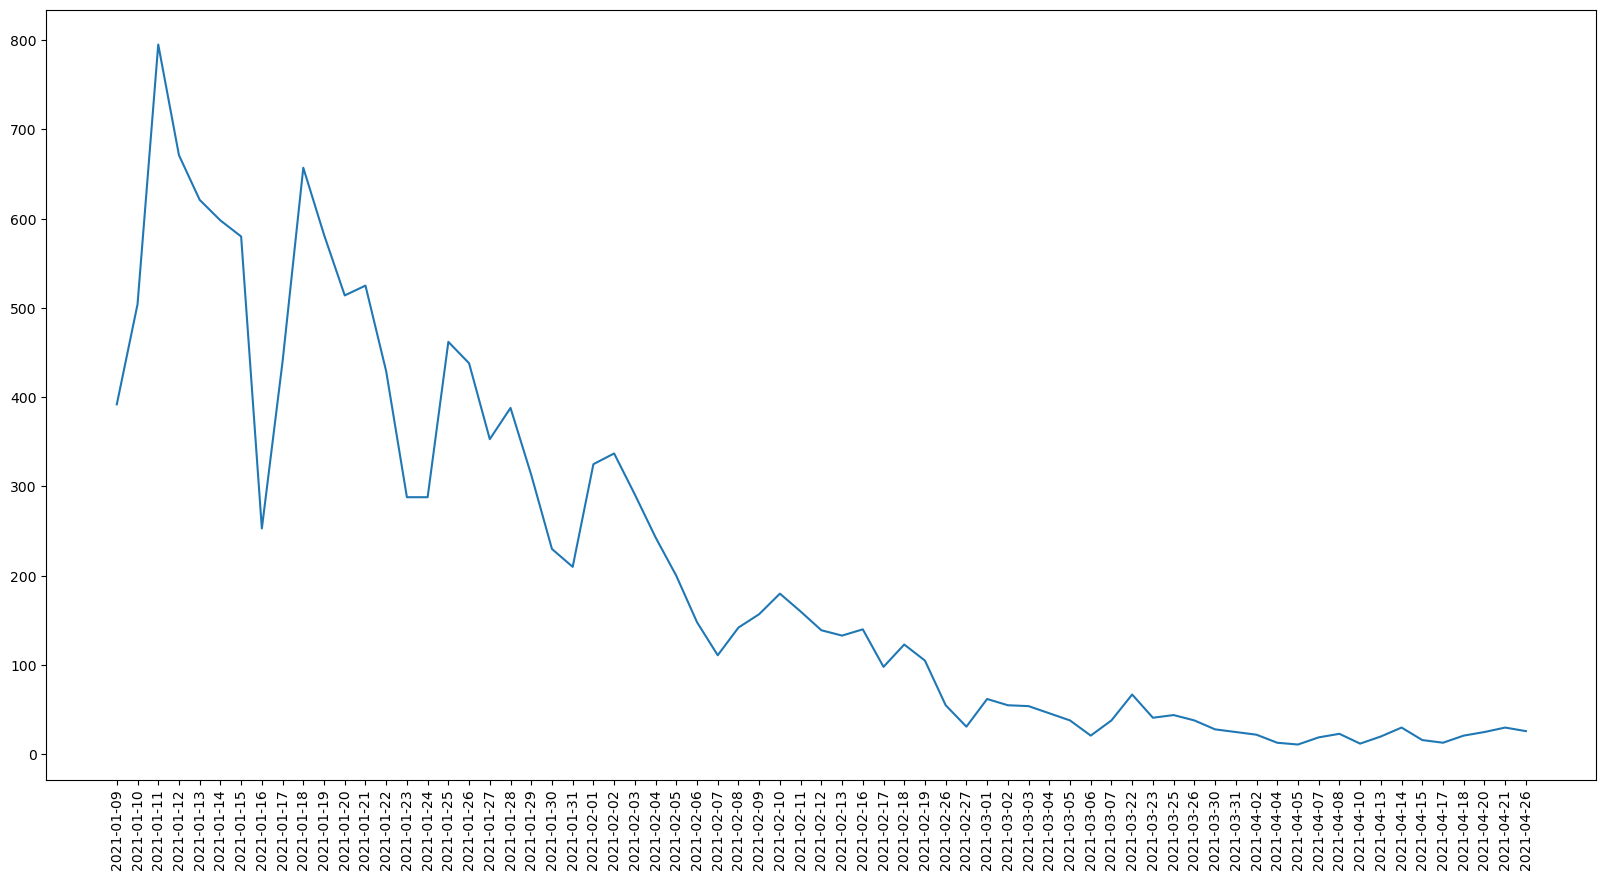

In [9]:
plt.figure(figsize=(20,10))
data = df[df['Area type'] == 'utla']
plt.xticks(rotation=90)
plt.plot(data.groupby('Specimen date').sum()['Daily lab-confirmed cases'])

In [10]:
data = df[df['Area type'] == 'utla']
output = data.groupby('Specimen date').sum()['Daily lab-confirmed cases']
output

Specimen date
2021-01-09    392
2021-01-10    504
2021-01-11    795
2021-01-12    671
2021-01-13    621
             ... 
2021-04-17     13
2021-04-18     21
2021-04-20     25
2021-04-21     30
2021-04-26     26
Name: Daily lab-confirmed cases, Length: 69, dtype: int64

In [11]:
for i in range(len(output)):
    oo = output[:i]
    plt.xticks(rotation=90)
    plt.plot(oo)
    plt.savefig(f"./pngs/{i}.png")
    plt.close()

In [12]:
import os

gif_name = 'COVID.gif'
fps = 6
file_list = sorted(glob.glob('./pngs/*.png'), key=os.path.getmtime)
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}'.format(gif_name), fps=fps)

MoviePy - Building file COVID.gif with imageio.


t:   0%|                                                                             | 0/69 [00:00<?, ?it/s, now=None]

t:   9%|██████                                                               | 6/69 [00:00<00:01, 56.82it/s, now=None]

t:  17%|███████████▊                                                        | 12/69 [00:00<00:01, 47.93it/s, now=None]

t:  25%|████████████████▊                                                   | 17/69 [00:00<00:01, 46.24it/s, now=None]

t:  32%|█████████████████████▋                                              | 22/69 [00:00<00:01, 45.54it/s, now=None]

t:  39%|██████████████████████████▌                                         | 27/69 [00:00<00:00, 44.94it/s, now=None]

t:  46%|███████████████████████████████▌                                    | 32/69 [00:00<00:00, 44.69it/s, now=None]

t:  54%|████████████████████████████████████▍                               | 37/69 [00:00<00:00, 44.69it/s, now=None]

t:  61%|█████████████████████████████████████████▍                          | 42/69 [00:00<00:00, 43.93it/s, now=None]

t:  68%|██████████████████████████████████████████████▎                     | 47/69 [00:01<00:00, 42.16it/s, now=None]

t:  75%|███████████████████████████████████████████████████▏                | 52/69 [00:01<00:00, 41.88it/s, now=None]

t:  83%|████████████████████████████████████████████████████████▏           | 57/69 [00:01<00:00, 41.92it/s, now=None]

t:  90%|█████████████████████████████████████████████████████████████       | 62/69 [00:01<00:00, 41.68it/s, now=None]

t:  97%|██████████████████████████████████████████████████████████████████  | 67/69 [00:01<00:00, 41.55it/s, now=None]